In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Dataset 
import pandas as pd

#Print Dataset to confirm number of rows and columns
df1 = pd.read_csv(r'C:\Uni_doc\dataset_sdn.csv')
print(df1)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       


# DATA CLEANING


In [4]:
#Statistics on missing values per column
df1.isnull().sum()
#Remove missing rows for'rx_kbps'
df1.dropna(
   axis=0,
   subset=['rx_kbps'],
   inplace=True
)
#Remove missing rows for'tot_kbps'
df1.dropna(
   axis=0,
   subset=['tot_kbps'],
   inplace=True
)

In [5]:
#Statistics on missing values per column again
df1.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [6]:
print(df1)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

#  correllation

In [7]:
corr=df1.corr()
corr

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
dt,1.000000,-0.006373,-0.174345,-0.289111,0.271664,-0.166514,0.271475,0.327694,0.043491,-0.233717,-0.308270,-0.233834,0.713059,-0.026066,0.077486,0.088301,-0.035187,-0.041620,-0.054373,-0.108798
switch,-0.006373,1.000000,-0.057639,-0.168475,-0.023560,-0.077123,-0.023687,-0.028017,0.199984,-0.036071,-0.112878,-0.036079,0.090657,-0.006854,-0.050625,-0.058007,-0.032980,-0.039025,-0.050972,0.027644
pktcount,-0.174345,-0.057639,1.000000,0.675792,0.023222,0.034283,0.023283,-0.257467,0.275867,0.470065,0.290614,0.470097,-0.085007,0.006073,0.025893,0.029731,0.001984,0.002328,0.003054,0.403217
bytecount,-0.289111,-0.168475,0.675792,1.000000,0.038033,0.029418,0.038034,-0.244514,-0.124840,0.333530,0.533201,0.333553,-0.388628,-0.008322,0.007110,0.008339,0.049803,0.058850,0.076920,0.278051
dur,0.271664,-0.023560,0.023222,0.038033,1.000000,-0.056219,0.999998,0.176351,-0.124797,-0.329504,-0.259843,-0.329764,0.180537,-0.002026,0.154209,0.176115,-0.141224,-0.166916,-0.218143,-0.098734
dur_nsec,-0.166514,-0.077123,0.034283,0.029418,-0.056219,1.000000,-0.054854,-0.010445,-0.059464,0.043277,0.047295,0.043279,-0.211168,0.020864,0.007767,0.008926,-0.035533,-0.042023,-0.054903,0.029161
tot_dur,0.271475,-0.023687,0.023283,0.038034,0.999998,-0.054854,1.000000,0.176352,-0.124876,-0.329483,-0.259831,-0.329744,0.180285,-0.001988,0.154251,0.176162,-0.141305,-0.167011,-0.218268,-0.098745
flows,0.327694,-0.028017,-0.257467,-0.244514,0.176351,-0.010445,0.176352,1.000000,0.047415,-0.212795,-0.246311,-0.212924,0.390747,0.029236,0.165628,0.189312,0.155590,0.183821,0.240285,-0.181510
packetins,0.043491,0.199984,0.275867,-0.124840,-0.124797,-0.059464,-0.124876,0.047415,1.000000,0.185407,-0.106459,0.185469,0.269968,0.000787,0.108195,0.124032,0.037910,0.044762,0.058529,-0.002489
pktperflow,-0.233717,-0.036071,0.470065,0.333530,-0.329504,0.043277,-0.329483,-0.212795,0.185407,1.000000,0.812940,0.999999,-0.171700,0.004801,-0.053207,-0.060848,0.105162,0.124257,0.162416,0.089608


<AxesSubplot: >

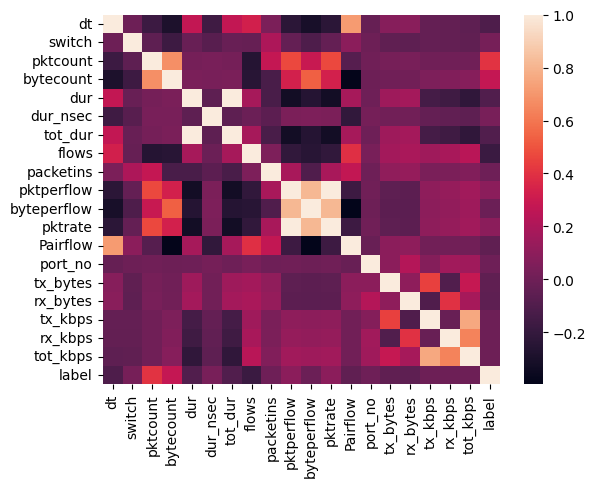

In [8]:
import seaborn as sns
sns.heatmap(corr)

In [9]:
df1.head

<bound method NDFrame.head of            dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [12]:
label_encoder =LabelEncoder()
# Encode labels in column. 
df1['Protocol']= label_encoder.fit_transform(df1['Protocol'])
df1['src']= label_encoder.fit_transform(df1['src'])
df1['dst']= label_encoder.fit_transform(df1['dst'])

In [13]:
df1.head

<bound method NDFrame.head of            dt  switch  src  dst  pktcount  bytecount  dur   dur_nsec  \
0       11425       1    0   16     45304   48294064  100  716000000   
1       11605       1    0   16    126395  134737070  280  734000000   
2       11425       1   10   16     90333   96294978  200  744000000   
3       11425       1   10   16     90333   96294978  200  744000000   
4       11425       1   10   16     90333   96294978  200  744000000   
...       ...     ...  ...  ...       ...        ...  ...        ...   
104340   5262       3   14   15        79       7742   81  842000000   
104341   5262       3   14   15        79       7742   81  842000000   
104342   5262       3    2   13        31       3038   31  805000000   
104343   5262       3    2   13        31       3038   31  805000000   
104344   5262       3    2   13        31       3038   31  805000000   

             tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no  \
0       1.010000e+11      3  ..

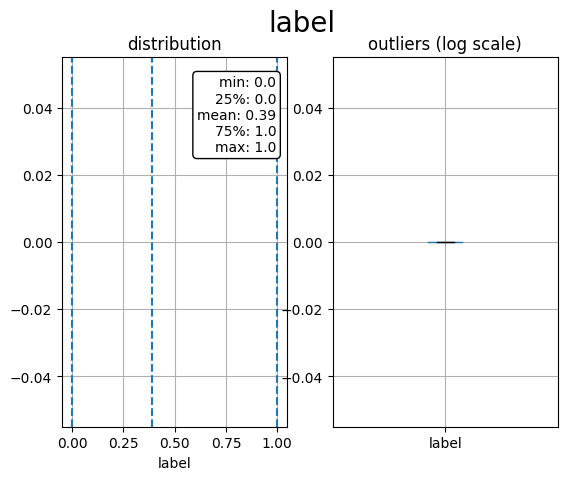

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
x = "label"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = df1[x].fillna(df1[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df1[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right"
           , bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df1[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

<AxesSubplot: xlabel='label', ylabel='count'>

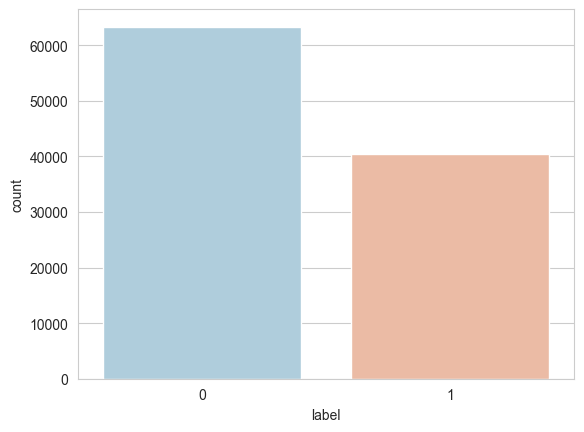

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=df1,palette='RdBu_r')

# feature_selection

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.19511e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


<AxesSubplot: xlabel='selection', ylabel='features'>

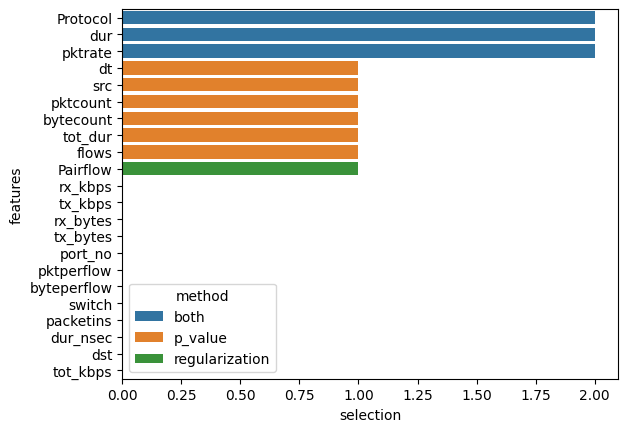

In [58]:
X = df1.drop("label", axis=1).values
y = df1["label"].values
feature_names = df1.drop("label", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func= feature_selection.f_regression, k=9).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=9).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

In [16]:
df1.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [103]:
df_selected=df1.loc[:,['Protocol','dur','pktrate','dt', 'src','pktcount','bytecount','tot_dur','flows','Pairflow']].copy()       


In [104]:
norm_data_random = df_selected.sample(frac=1 )
norm_data_random.shape

(103839, 10)

In [105]:
# Data Nomarlisation; Scaling of Integer Values using X values to predict y
scaler  = StandardScaler()
df_selected = scaler.fit_transform(df_selected)


In [106]:
#defining datasets for X and Y 

#X=norm_data_random[['Protocol','dur','pktrate','dt', 'src','pktcount','bytecount','tot_dur','flows','Pairflow']]
#Y=norm_data_random['label']
X = norm_data_random.iloc[:, :-1].values
y = norm_data_random.iloc[:, -1].values


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123) 
# split dataset into training and test

In [109]:
X

array([[1.0000000e+00, 2.3200000e+02, 6.0000000e+02, ..., 7.3818540e+06,
        2.3200000e+11, 7.0000000e+00],
       [1.0000000e+00, 2.2900000e+02, 2.6000000e+02, ..., 3.8772420e+06,
        2.3000000e+11, 5.0000000e+00],
       [2.0000000e+00, 3.0300000e+02, 3.1200000e+02, ..., 9.8960824e+07,
        3.0300000e+11, 2.0000000e+00],
       ...,
       [1.0000000e+00, 8.1000000e+01, 2.9800000e+02, ..., 1.7249660e+06,
        8.1370000e+10, 9.0000000e+00],
       [2.0000000e+00, 1.0700000e+02, 4.5500000e+02, ..., 5.1375870e+07,
        1.0700000e+11, 3.0000000e+00],
       [2.0000000e+00, 1.6200000e+02, 4.5300000e+02, ..., 7.8371254e+07,
        1.6300000e+11, 3.0000000e+00]])

# Data Nomarlisation; Scaling of Integer Values using X values to predict y
scaler  = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# ML

In [110]:
from sklearn  import ensemble
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error, r2_score

In [111]:
def score_BeforeTuning(algoname,yPredicted):
    return algoname, round(accuracy_score(y_test, yPredicted),3) , round(mean_absolute_error(y_test, yPredicted),3), round(mean_squared_error(y_test, yPredicted),3), round(np.sqrt(mean_squared_error(y_test, yPredicted)),3)

score=[]

## Training the Logistic Regression model on the Training set

In [112]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_LR = classifier_log.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred_LR)
#print(cm)
df_cm = pd.DataFrame(cm_LR, index=['1','2'], 
                     columns = ['1','2'])
print(df_cm)
score.append(score_BeforeTuning('LogisticRegression',y_pred_LR))
accuracy_score(y_test, y_pred_LR)

       1  2
1  19026  0
2  12126  0


0.6107473035439137

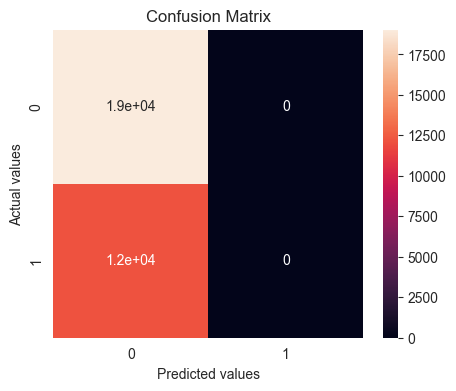

In [114]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_LR,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     19026
           1       0.00      0.00      0.00     12126

    accuracy                           0.61     31152
   macro avg       0.31      0.50      0.38     31152
weighted avg       0.37      0.61      0.46     31152



## Training the Kernel SVM model on the Training set


In [127]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(random_state=0)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVC = classifier_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_SVC)
score.append(score_BeforeTuning('SVC-rbf',y_pred_SVC))
accuracy_score(y_test, y_pred_SVC)

0.6107473035439137

In [ ]:
from sklearn.svm import SVC
classifier_svc_l = SVC(kernel = 'linear', random_state = 0)
classifier_svc_l.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVC_1 = classifier_svc_l.predict(X_test)
cm = confusion_matrix(y_test, y_pred_SVC_1)
score.append(score_BeforeTuning('SVC-Linear',y_pred_SVC_1))
accuracy_score(y_test, y_pred_SVC_1)

## Training the Decision Tree Classification model on the Training set

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier_tr = DecisionTreeClassifier()
classifier_tr.fit(X_train, y_train)
y_pred_tr = classifier_tr.predict(X_test)
y_pred_tr_train = classifier_tr.predict(X_train)

In [117]:
y_pred_dt

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_tr)
score.append(score_BeforeTuning('DecisionTreeClassifier',y_pred_tr))
accuracy_score(y_test, y_pred_tr)
#accuracy_score(y_test, y_pred_dt_train)

0.5629815100154083

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_tr))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69     19026
           1       0.39      0.21      0.28     12126

    accuracy                           0.56     31152
   macro avg       0.50      0.50      0.48     31152
weighted avg       0.52      0.56      0.53     31152



In [120]:
score

[('LogisticRegression', 0.611, 0.389, 0.389, 0.624),
 ('DecisionTreeClassifier', 0.563, 0.437, 0.437, 0.661)]

In [121]:
print(cm)

[[14935  4091]
 [ 9523  2603]]


In [130]:
from sklearn.tree import DecisionTreeClassifier
classifier_tr_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_tr_2.fit(X_train, y_train)

y_pred_dt_2 = classifier_tr_2.predict(X_test)


#print(np.concatenate((y_pred_dt_2.reshape(len(y_pred_dt_2),1), y_test.reshape(len(y_test),1)),1))

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tr_2 = confusion_matrix(y_test, y_pred_dt_2)
score.append(score_BeforeTuning('DecisionTreeClassifier_criterion = entropy',y_pred_dt_2))
print(cm_tr_2)
accuracy_score(y_test, y_pred_dt_2)

[[14943  4083]
 [ 9529  2597]]


0.5630457113507961

## Training the Random Forest Classification model on the Training set

In [123]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_RF)
score.append(score_BeforeTuning('RandomForestClassifier',y_pred_RF))
accuracy_score(y_test, y_pred_RF)

0.549338726245506

# Cpmpare Models

In [133]:
pd.DataFrame(score, columns=['Model', 'accuracy_score', 'MAE', 'MSE', 'RMSE'])

,Model,accuracy_score,MAE,MSE,RMSE
0,LogisticRegression,0.611,0.389,0.389,0.624
1,DecisionTreeClassifier,0.563,0.437,0.437,0.661
2,RandomForestClassifier,0.549,0.451,0.451,0.671
3,SVC-rbf,0.611,0.389,0.389,0.624
4,DecisionTreeClassifier_criterion = entropy,0.563,0.437,0.437,0.661


<AxesSubplot: xlabel='Model'>

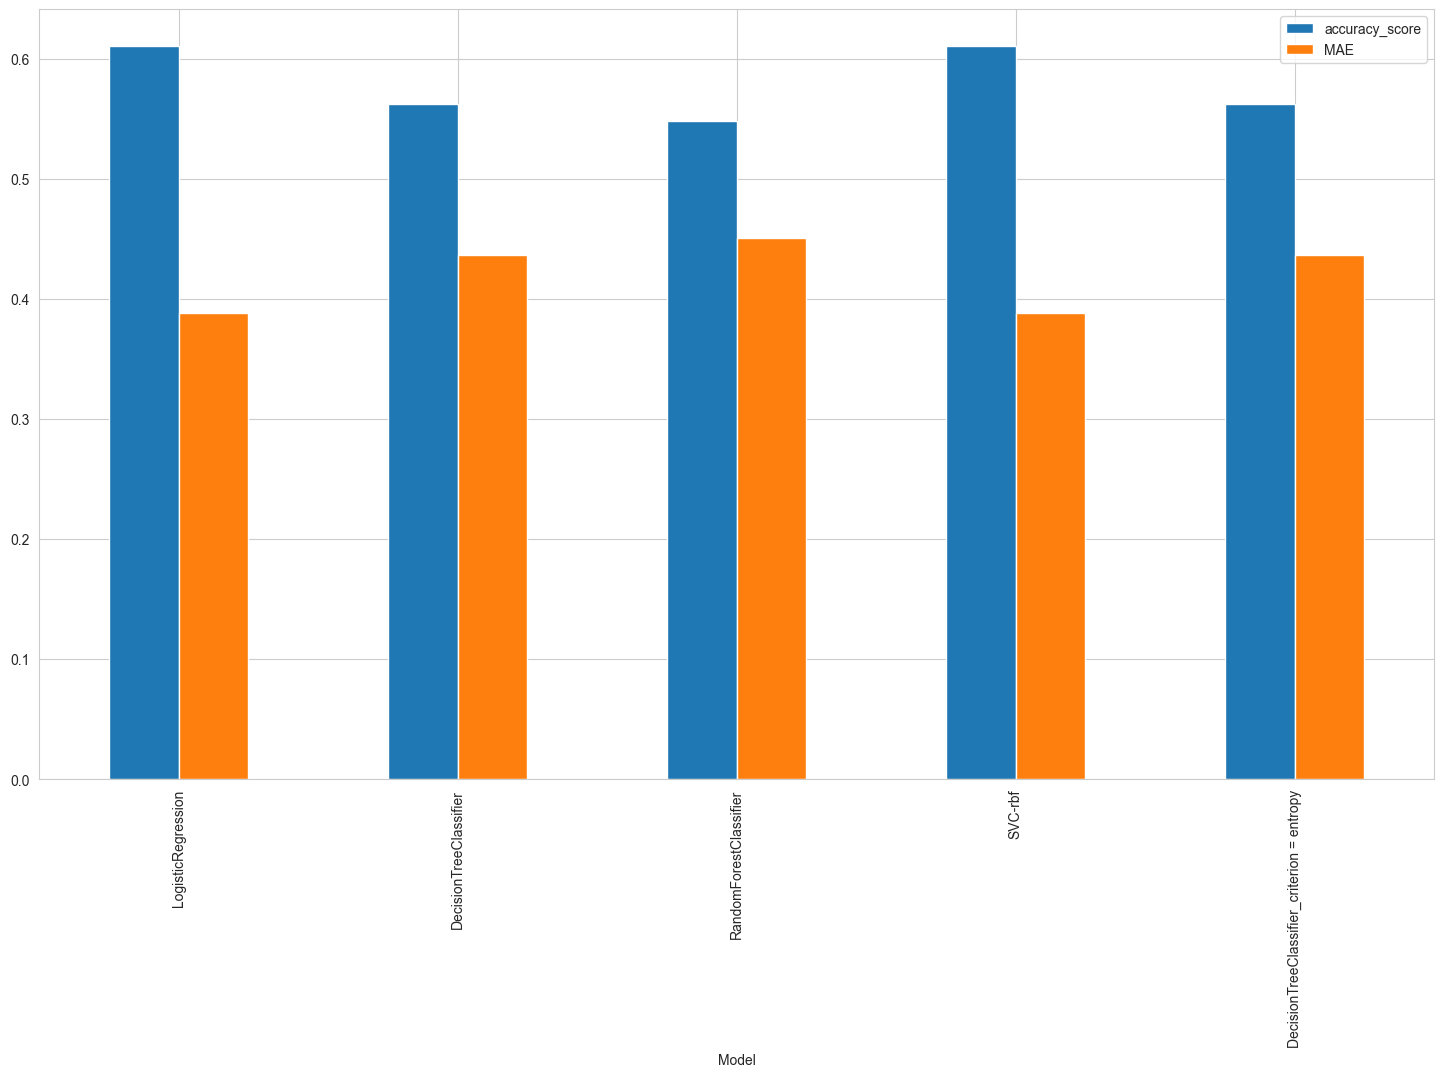

In [134]:
pd.DataFrame(score, columns=['Model','accuracy_score', 'MAE', 'MSE', 'RMSE']).plot(x="Model"
                                                                                   , y=["accuracy_score", "MAE"]
                                                                                   , kind="bar", figsize=(18,10))